# Iterative forecasting

Iterative forecasting (sometimes called recursive) involves repeatedly predicting 
with a forecaster by adding predicted values to the actual values. Suppose you have a series of length $n$ and 
you want to forecast the next 20 steps, the pseudocode for this is as follows.

```
call f.fit(y)
for i ← 1 to predictive_horizon do
    preds[i - 1] ← f.predict(y)
    y.append(preds[i - 1])
end for
```
 In contrast to [direct forecasting](./direct.ipynb), the iterative forecast only 
 ever fits a single model. You can visualise the process as follows

<img src="./img/iterative.png" width="600" alt="iterative forecasting">


We will demonstrate direct forecasting with the airline data

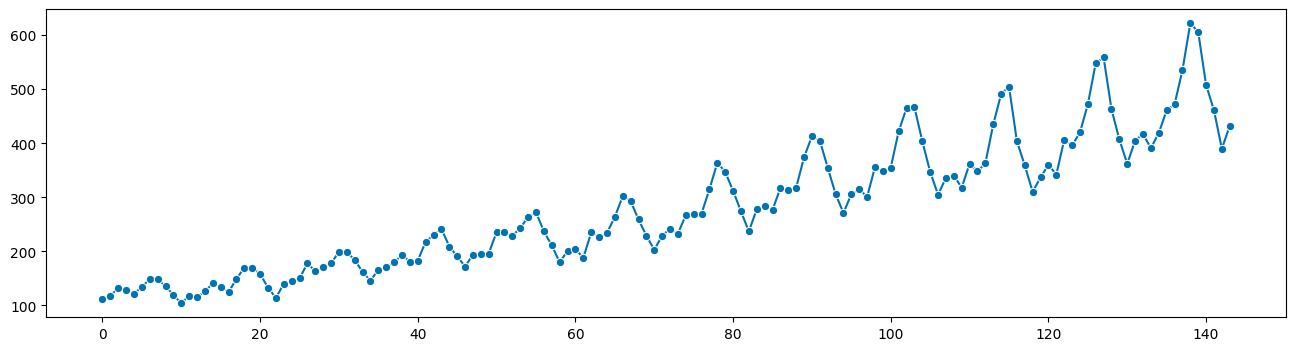

In [21]:
from aeon.datasets import load_airline
from aeon.visualisation import plot_series

airline = load_airline()
_ = plot_series(airline)

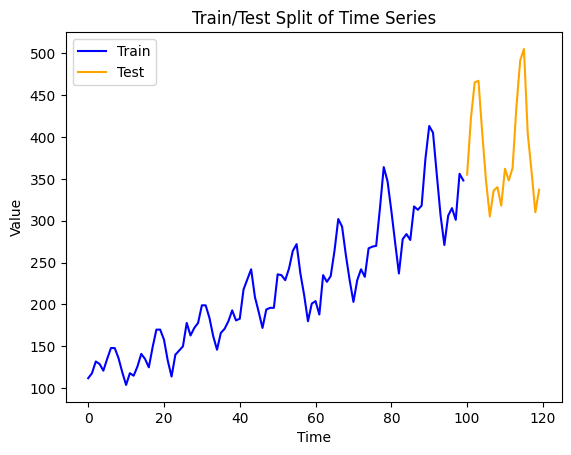

In [22]:
import matplotlib.pyplot as plt
import numpy as np

y_train = airline[:100]
y_test = airline[100:120]
plt.plot(np.arange(0, len(y_train)), y_train, label="Train", color="blue")
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_test,
    label="Test",
    color="orange",
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Train/Test Split of Time Series")
plt.show()

We want to train a forecaster on the train set and forecast predictions for the
subsequent test steps. The `RegressionForecaster` is a window based forecaster that 
by default uses linear regression to predict one step ahead. It requires a window 
parameter. See the [forecasting with regression](./regression.ipynb) notebook for 
details. The `forecast()` method makes a single forecast `horizon` steps ahead. 

In [23]:
from aeon.forecasting import RegressionForecaster

reg = RegressionForecaster(horizon=1, window=10)
p1 = reg.forecast(y_train)
print(" First forecast = ", p1)

 First forecast =  376.10513465806844


what if we want to predict further ahead? The direct strategy, described [here](./direct.ipynb)
retrains the model for each set, changing the forecasting horizon. This can
 be computationally intensive. As an alternative, the iterative 
 strategy uses the predicted value and predicts without refitting.

In [24]:
y_new = np.append(y_train, p1)
p2 = reg.predict(y_new)
y_new = np.append(y_new, p2)
p3 = reg.predict(y_new)
print(f" second forecast = {p2} third forecast = {p3}")

 second forecast = 427.1861353919512 third forecast = 418.40595828752396


there is a function in the base class to make iterative forecasting easier.

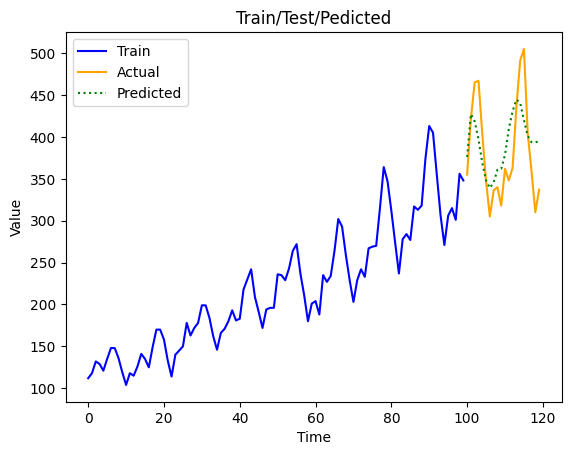

In [25]:
y_hat = reg.iterative_forecast(y=y_train, prediction_horizon=20)

plt.plot(np.arange(0, len(y_train)), y_train, label="Train", color="blue")
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_test,
    label="Actual",
    color="orange",
)
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_hat)),
    y_hat,
    label="Predicted",
    color="green",
    linestyle=":",
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Train/Test/Pedicted")
plt.show()

Looking closer, we can see the errors our forecaster is making.

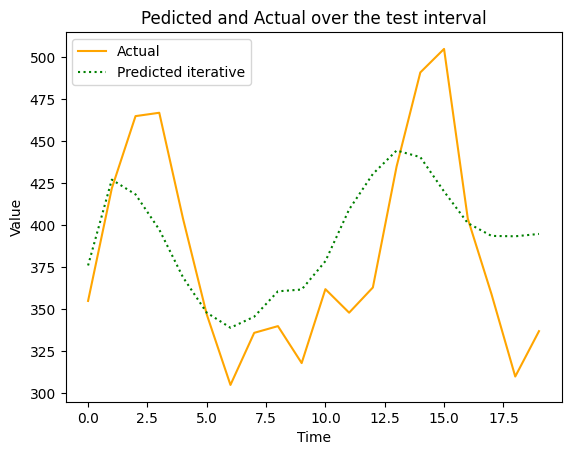

In [26]:
plt.plot(y_test, label="Actual", color="orange")
plt.plot(y_hat, label="Predicted iterative", color="green", linestyle=":")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Pedicted and Actual over the test interval")
plt.show()

It seems to be underestimating the peaks and troughs. Contrast this to the direct 
strategy which results in very different forecasts 

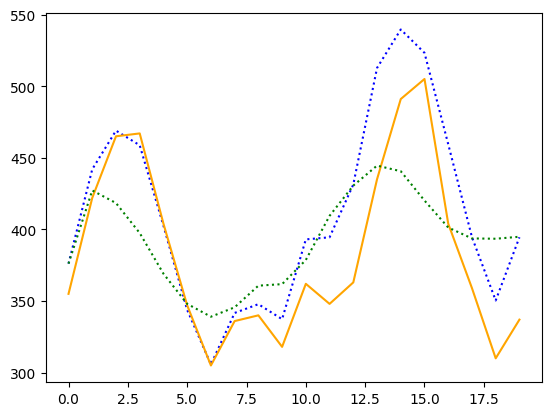

In [27]:
y_hat2 = reg.direct_forecast(y=y_train, prediction_horizon=20)
plt.plot(y_hat2, label="Predicted direct", color="blue", linestyle=":")
plt.plot(y_test, label="Actual", color="orange")
plt.plot(y_hat, label="Predicted iterative", color="green", linestyle=":")
plt.show()